# Codsoft's Data Science Task 1
## Titanic Survival Prediction


### Import necessary libraries

In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Read the dataset

In [62]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# Analyze the data

<AxesSubplot: xlabel='Survived', ylabel='count'>

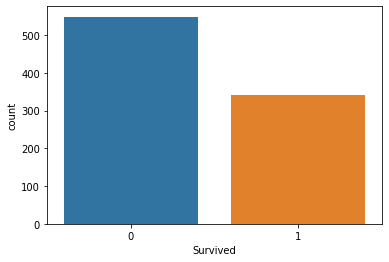

In [65]:
sns.countplot(df,x= 'Survived')

In [66]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='count'>

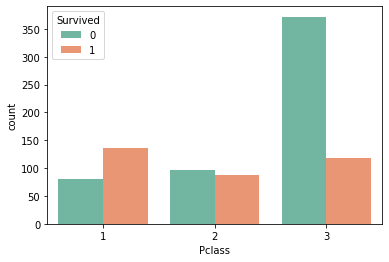

In [67]:
sns.countplot(df,x= 'Pclass',hue='Survived',palette ='Set2' )

As this graph indicate that most of the people who did not survived are belong to 3 class.

<AxesSubplot: xlabel='Sex', ylabel='count'>

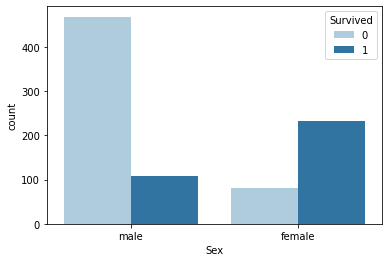

In [68]:
sns.countplot(df,x='Sex',hue='Survived',palette='Paired')

As we can interprate that people who did not survived are more male as compared to female and vice-versa.

<AxesSubplot: xlabel='Age', ylabel='Count'>

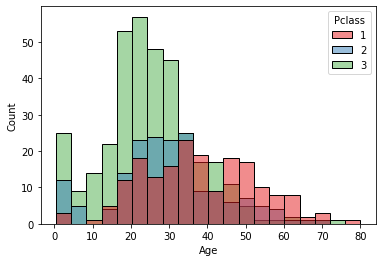

In [69]:
sns.histplot(df,x='Age',palette='Set1',bins=20 , hue='Pclass')

As we can see that age of the people mostly lie within the bracket of 20 to 40 years of age and Also, the majority of Class 1 passengers are older.

<AxesSubplot: xlabel='SibSp', ylabel='count'>

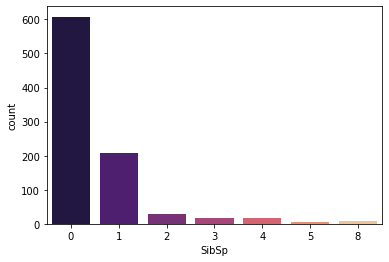

In [70]:
sns.countplot(df,x='SibSp',palette='magma')

SibSp is the data about the number of Sibling and Spouse were there on the deck.

<AxesSubplot: xlabel='Parch', ylabel='count'>

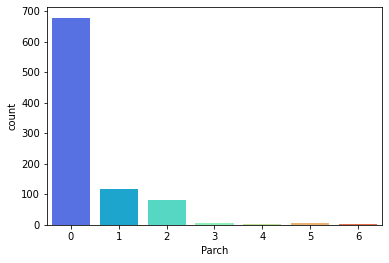

In [71]:
sns.countplot(df,x='Parch',palette = 'rainbow')

Parch is the data about the number of Parents and Children were there on the deck.

<AxesSubplot: xlabel='Fare', ylabel='Count'>

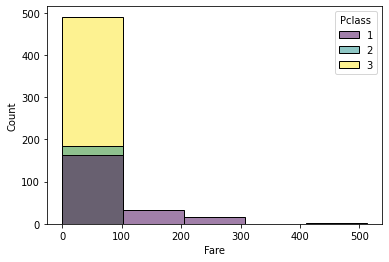

In [72]:
sns.histplot(df,x='Fare',hue='Pclass',bins=5,palette='viridis')

The above given figure indicate that higher the class higher the price.

In [73]:
cabin = df['Cabin'].value_counts()
cabin.head()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: Cabin, dtype: int64

As we can see there is so much variation in cabins so we will drop that column too.

<AxesSubplot: xlabel='Embarked', ylabel='count'>

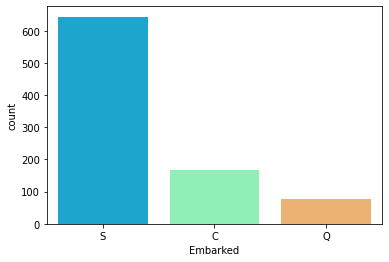

In [74]:
sns.countplot(df,x='Embarked',palette= 'rainbow')

## Clean the data for building Machine Learning model.

As we have go through some columns which are not really matter so initially get rid of those columns

In [75]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [76]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [77]:
df['Sex'].replace({'male':1, 'female':0}, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


Where:
    0: Female
    1: Male

In [78]:
df['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


Where: S:0  C:1  Q:2

<AxesSubplot: >

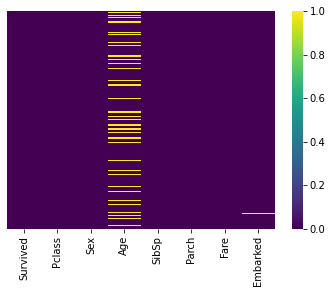

In [79]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

As it indicate that most of the Age columns and also some of embarked columns are null.

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

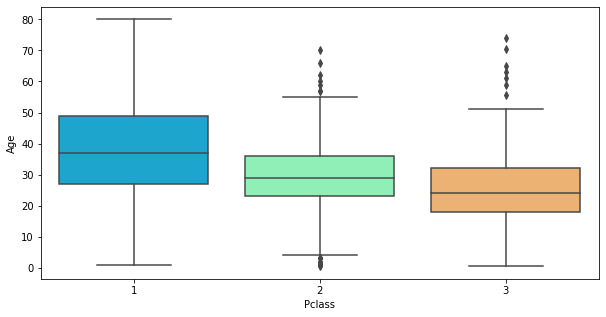

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(df,x='Pclass',y = 'Age',palette='rainbow')

In [81]:
def fillage(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return  38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [82]:
df['Age'] = df[['Age','Pclass']].apply(fillage,axis=1)

<AxesSubplot: >

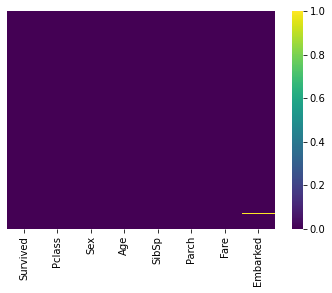

In [83]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [84]:
df.dropna(inplace = True)

<AxesSubplot: >

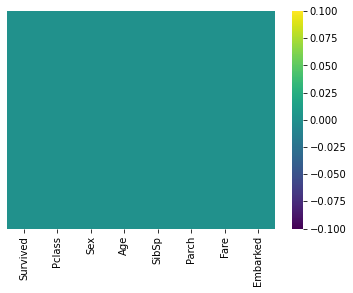

In [85]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [86]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


## Building Machine Learning Model (Logestic Regression) 

In [88]:
lr = LogisticRegression()

In [89]:
X = df.drop('Survived',axis=1)

In [90]:
y = df['Survived']

In [91]:
lr.fit(X,y)

C:\Users\Aliarh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
predicted = lr.predict(X)

In [93]:
print(classification_report(y,predicted))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.78      0.70      0.74       340

    accuracy                           0.81       889
   macro avg       0.80      0.79      0.79       889
weighted avg       0.81      0.81      0.81       889



The model results are satisfactory for predictions.

In [94]:
confusion_matrix(y,predicted)

array([[480,  69],
       [101, 239]], dtype=int64)

# Now it's time to test the model

In [95]:
df_test = pd.read_csv('titanic_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [97]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [98]:
df_test = df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [99]:
df_test['Sex'].replace({'male':1, 'female':0}, inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [100]:
df_test['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


<AxesSubplot: >

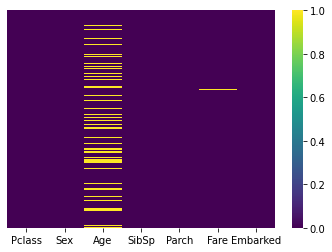

In [101]:
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

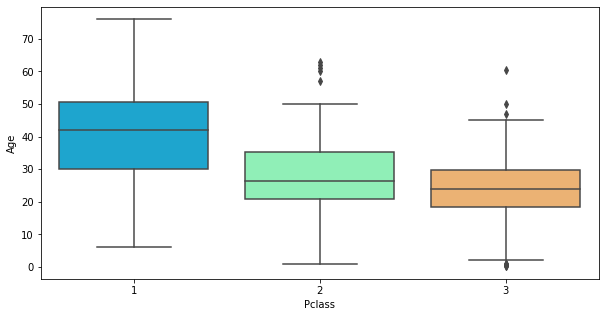

In [102]:
plt.figure(figsize=(10,5))
sns.boxplot(df_test,x='Pclass',y = 'Age',palette='rainbow')

In [103]:
def fillage(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
    
        if Pclass == 1:
            return  41
        elif Pclass == 2:
            return 28
        else:
            return 25
    else:
        return Age

In [104]:
df_test['Age'] = df_test[['Age','Pclass']].apply(fillage,axis=1)

<AxesSubplot: >

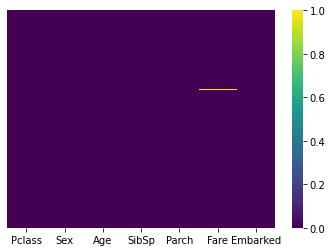

In [105]:
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='viridis')

In [106]:
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

<AxesSubplot: >

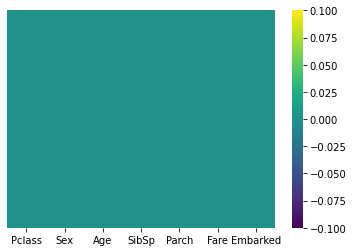

In [107]:
sns.heatmap(df_test.isnull(),yticklabels=False,cmap='viridis')

In [108]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


#  Predicting through Logistic Regression Model

In [109]:
predicted = lr.predict(df_test)

In [110]:
df_test['SurPredicted'] = predicted

In [111]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SurPredicted
0,3,1,34.5,0,0,7.8292,2,0
1,3,0,47.0,1,0,7.0000,0,0
2,2,1,62.0,0,0,9.6875,2,0
3,3,1,27.0,0,0,8.6625,0,0
4,3,0,22.0,1,1,12.2875,0,1


In [112]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'SurPredicted'],
      dtype='object')

In [55]:
lr.predict([[1,1,24,0,0,100,0]])

C:\Users\Aliarh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [56]:
lr.predict([[1,1,89,9,1,100000,1]])

C:\Users\Aliarh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)